Image Data Shape (284, 50, 50, 1)
Label Data Shape 284
0.7543859649122807
[[ 5 13]
 [ 1 38]]
Number of Correct predicted: 43 of 57
0.7543859649122807


0.6305555555555555

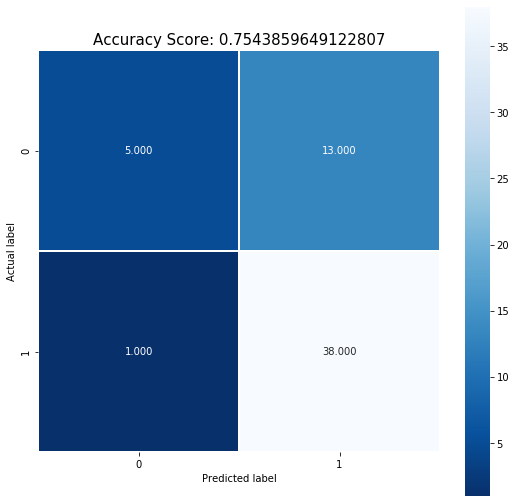

In [45]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle","rb")
Y = pickle.load(pickle_in)

X = X/255.0

tam=len(Y)

print("Image Data Shape" , X.shape)
print("Label Data Shape", len(Y))

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X.reshape(tam,-1),Y, test_size=0.2, random_state=0)

from sklearn.neural_network import MLPClassifier
mlperceptron = MLPClassifier(solver='sgd', hidden_layer_sizes=(25), activation='logistic',max_iter=500, early_stopping=True)

mlperceptron.fit(x_train, y_train)

predictions = mlperceptron.predict(x_test)

score = mlperceptron.score(x_test, y_test)
print(score)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predictions, normalize=False)
print("Number of Correct predicted: " + str(acc) +" of "+ str(len(y_test)))
print(acc / len(y_test))

from sklearn.metrics import f1_score
f1_score(y_test, predictions, average='macro')